In [6]:
%load_ext autoreload
%autoreload 2 

import numpy as np
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# from re1_utils.camera import get_rs_extrinsic_mat
# extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
inv_extrinsic_mat = np.array(\
[[    0.99917,   -0.036799,    0.017461,    0.012127],
 [   0.018093,    0.016906,    -0.99969,    0.016835],
 [   0.036493,     0.99918,    0.017558,      1.2441],
 [          0,           0,           0,           1]]
)

inv_intrinsic_mat = np.array(
[[  0.0016489,           0,     -0.5342],
 [          0,   0.0016491,    -0.38722],
 [          0,           0,           1]]
)

In [21]:
from POI.object_of_interest import OOI
pred =np.array( 
[[        121,         342,         296,         628,     0.89368,          56,],
 [        351,         398,         456,         595,     0.88076,          56,],
 [        243,         303,         380,         373,     0.81538,          62,],
 [        221,         521,         250,         610,     0.45188,          39,],
 [        402,         345,         421,         394,     0.42215,          39,],
 [        291,         375,         401,         398,     0.36896,          66,],
 [        402,         345,         421,         394,     0.36451,          41] ])
depths = [2.69, 3.32, 3.13, 1.89, 3.32, 3.07, 3.32]
all_objects = []
for i in range(pred.shape[0]):
    coord = pred[i, :]
    obj = OOI(
        img_coord = np.array([(coord[2]-coord[0])/2,(coord[3]-coord[1])/2]), 
        depth = depths[i],
        obj_class = int(coord[-1]),
        obj_atributes = 'None', 
        bbox = ((coord[0],coord[1]),(coord[2],coord[3])),
        conf_score = coord[4],
        eid = i
    )
    all_objects.append(obj)

In [28]:
landmarks = {'locations': {}, 'objects': {}}
for i, object in enumerate(all_objects):
    landmarks['objects'][i] = object
    landmarks['objects'][i].set_cam_coord(inv_intrinsic_mat)
    landmarks['objects'][i].set_world_coord(inv_extrinsic_mat)

In [31]:
for i, object in enumerate(all_objects):
    print(landmarks['objects'][i].cam_coord,landmarks['objects'][i].base_coord)

[-1.04888816 -0.4072625   2.69      ] [-0.97393364 -2.69819381  0.8461254 ]
[-1.48614073 -0.74628172  3.32      ] [-1.38734729 -3.34164118  0.50248906]
[-1.3185136 -1.0313397  3.13     ] [-1.21268703 -3.1534864   0.22044603]
[-0.9644499  -0.59314824  1.89      ] [-0.89669385 -1.90005666  0.64942709]
[-1.72153769 -1.15143261  3.32      ] [-1.60763973 -3.3527497   0.08908005]
[-1.36157723 -1.13054392  3.07      ] [-1.25311197 -3.09596129  0.11869814]
[-1.72153769 -1.15143261  3.32      ] [-1.60763973 -3.3527497   0.08908005]


In [67]:
from planning.path_planner import PathPlanner
path_planner = PathPlanner(landmark_dict=landmarks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


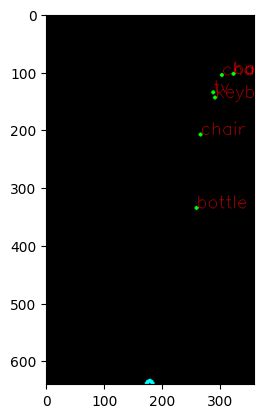

In [68]:
path_planner.viz()
